# Topic Modeling in R: A Toy Example

https://www.datacamp.com/courses/topic-modeling-in-r

Joe Brillantes, ph.linkedin.com/in/joebrillantes/, Sep 2021

## Why Topic Modeling

Topic models are a way to get an idea what the documents are about without reading each document.
* TOPIC is a label for a collection of WORDS that often occur together. Words such as "rain", "storm", "snow", "winds", "ice" often occur together for the topic "weather".
* TOPIC MODELING is the process of finding a collection of TOPICS fitted to a set of DOCUMENTS.
* A CORPUS is a set of documents.

## Step 0: Loading the Necessary Packages

In [1]:
installOrLoadPackage <- function(listOfPackages) {
    repository <- 'https://cloud.r-project.org/'
    for (package in listOfPackages) {
        if (package %in% row.names(installed.packages()) == TRUE) {
            update.packages(package, dependecies = TRUE, repos=repository)
        } else {
            install.packages(package, repos=repository)
        }
        require(package, character.only = TRUE)
    }
}
installOrLoadPackage(c('dplyr','tm','tidytext','topicmodels','ggplot2','reshape2', 'tidyr','wordcloud'))

Loading required package: dplyr

Warning message:
"package 'dplyr' was built under R version 4.0.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tm

Warning message:
"package 'tm' was built under R version 4.0.3"
Loading required package: NLP

Warning message:
"package 'NLP' was built under R version 4.0.3"
Loading required package: tidytext

Warning message:
"package 'tidytext' was built under R version 4.0.3"
Loading required package: topicmodels

Warning message:
"package 'topicmodels' was built under R version 4.0.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"

Attaching package: 'ggplot2'


The following object is masked from 'package:NLP':

    annotate


Loading required package: reshape2

Warning message:
"package 'reshape2' was built under

## Step 1: Loading the Corpus

In [2]:
the_corpus <- c("Due to bad loans, the bank agreed to pay the fines.",
                "If you are late to pay off your loans to the bank, you will face fines.",
                "A new restaurant opened in downtown.",
                "There is a new restaurant that just opened on Warwick street.",
                "How will you pay off the loans you will need for the restaurant you want opened?")

the_corpus <- data.frame(doc_id = paste('', 1:length(the_corpus), sep=''), content = the_corpus)
print(the_corpus)

  doc_id
1      1
2      2
3      3
4      4
5      5
                                                                           content
1                              Due to bad loans, the bank agreed to pay the fines.
2          If you are late to pay off your loans to the bank, you will face fines.
3                                             A new restaurant opened in downtown.
4                    There is a new restaurant that just opened on Warwick street.
5 How will you pay off the loans you will need for the restaurant you want opened?


## Step 2: Tokenization (Splitting Text into Words)

In [3]:
the_corpus %>% unnest_tokens(input=content, output=word)

,doc_id,word
,<chr>,<chr>
1,1,due
1.1,1,to
1.2,1,bad
1.3,1,loans
1.4,1,the
1.5,1,bank
1.6,1,agreed
1.7,1,to
1.8,1,pay


## Step 3: Counting Words

In [4]:
the_corpus %>% unnest_tokens(input=content, output=word) %>% count(doc_id, word)

doc_id,word,n
<chr>,<chr>,<int>
1,agreed,1
1,bad,1
1,bank,1
1,due,1
1,fines,1
1,loans,1
1,pay,1
1,the,2
1,to,2


## Step 4: Casting Counts into a Document-Term Matrix

In [5]:
dtm <- the_corpus %>% unnest_tokens(input=content, output=word) %>% 
                      count(doc_id, word) %>% 
                      cast_dtm(document=doc_id, term=word, value=n)
as.matrix(dtm)

,agreed,bad,bank,due,fines,loans,pay,the,to,are,...,just,on,street,that,there,warwick,for,how,need,want
1,1,1,1,1,1,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
5,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,0,0,1,1,1,1


## Step 5: Fitting a Topic Model

The LDA model object contains two matrices: beta and gamma

* beta contains probabilities of words in topics
* gamma contains probabilities of topics in documents

In [6]:
lda_mod1 <- LDA(x=dtm, k=2, method="Gibbs", control=list(alpha=1, seed=12345))
tidy(lda_mod1, matrix="beta") %>% spread(topic, beta)
tidy(lda_mod1, matrix="gamma") %>% spread(topic, gamma)

term,1,2
<chr>,<dbl>,<dbl>
a,0.002252252,0.093750000
agreed,0.024774775,0.004464286
are,0.024774775,0.004464286
bad,0.024774775,0.004464286
bank,0.047297297,0.004464286
downtown,0.002252252,0.049107143
due,0.024774775,0.004464286
face,0.024774775,0.004464286
fines,0.047297297,0.004464286


document,1,2
<chr>,<dbl>,<dbl>
1,0.9230769,0.07692308
2,0.9444444,0.05555556
3,0.1250000,0.87500000
4,0.1538462,0.84615385
5,0.7777778,0.22222222


## Step 6: Graphing the Gamma and Beta Matrices

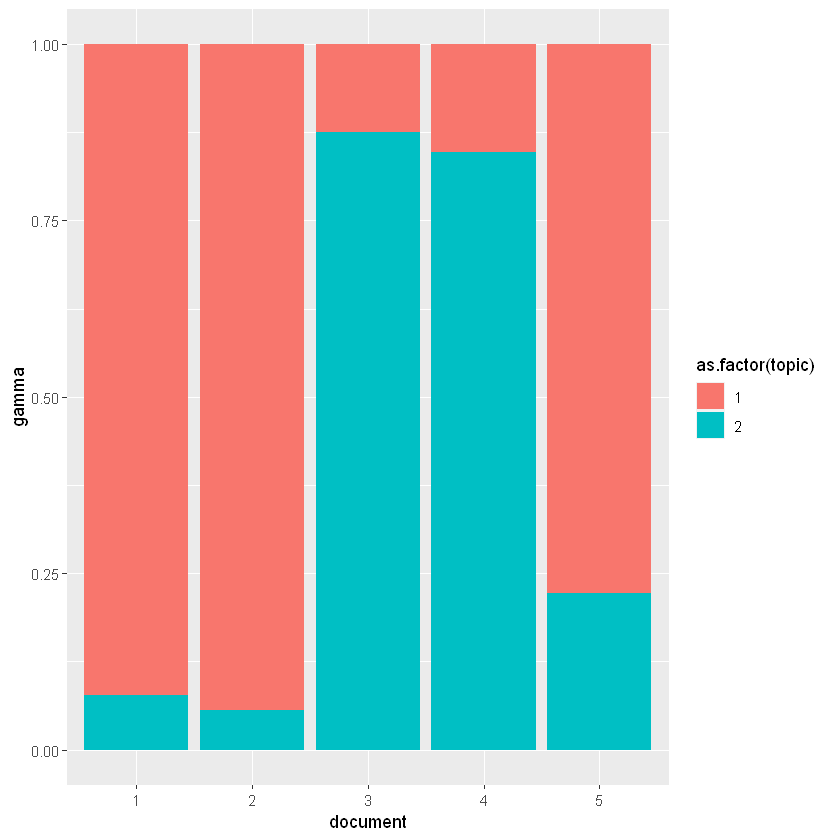

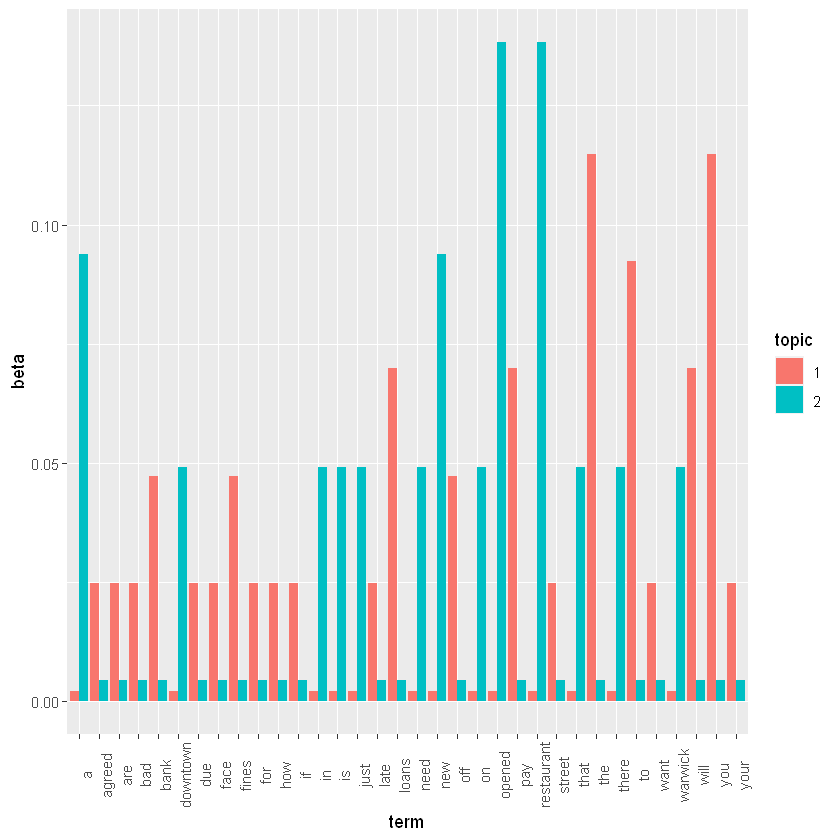

In [7]:
tidy(lda_mod1, matrix="gamma") %>% ggplot(aes(x=document, y=gamma)) + geom_col(aes(fill=as.factor(topic)))
tidy(lda_mod1, matrix="beta") %>% mutate(topic = as.factor(topic)) %>% ggplot(aes(x=term, y=beta)) + 
geom_col(aes(fill=topic), position=position_dodge()) +
theme(axis.text.x = element_text(angle=90))

## Removing stopwords

Stopwords are extremely common words that carry very little useful information.

In [8]:
## # Create the document-term matrix with stop words removed
dtm <- the_corpus %>% 
  unnest_tokens(output=word, input=content) %>%
  anti_join(stop_words) %>% 
  count(doc_id, word) %>%
  cast_dtm(document=doc_id, term=word, value=n)

# Display the matrix
as.matrix(dtm)

Joining, by = "word"



,agreed,bad,bank,due,fines,loans,pay,late,downtown,restaurant,street,warwick
1,1,1,1,1,1,1,1,0,0,0,0,0
2,0,0,1,0,1,1,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,1,1,1
5,0,0,0,0,0,1,1,0,0,1,0,0


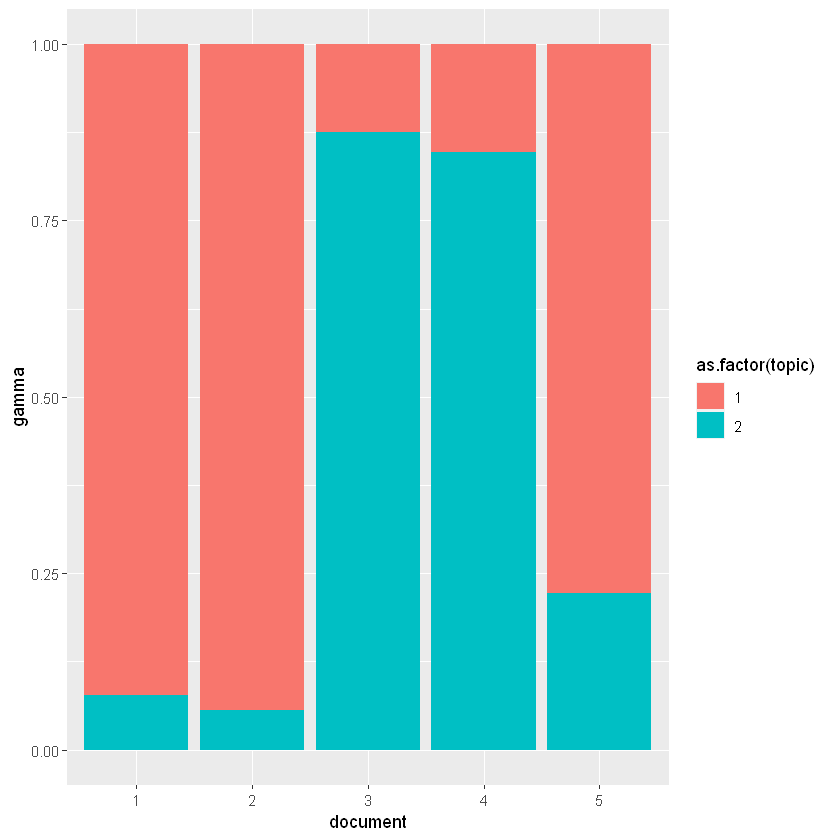

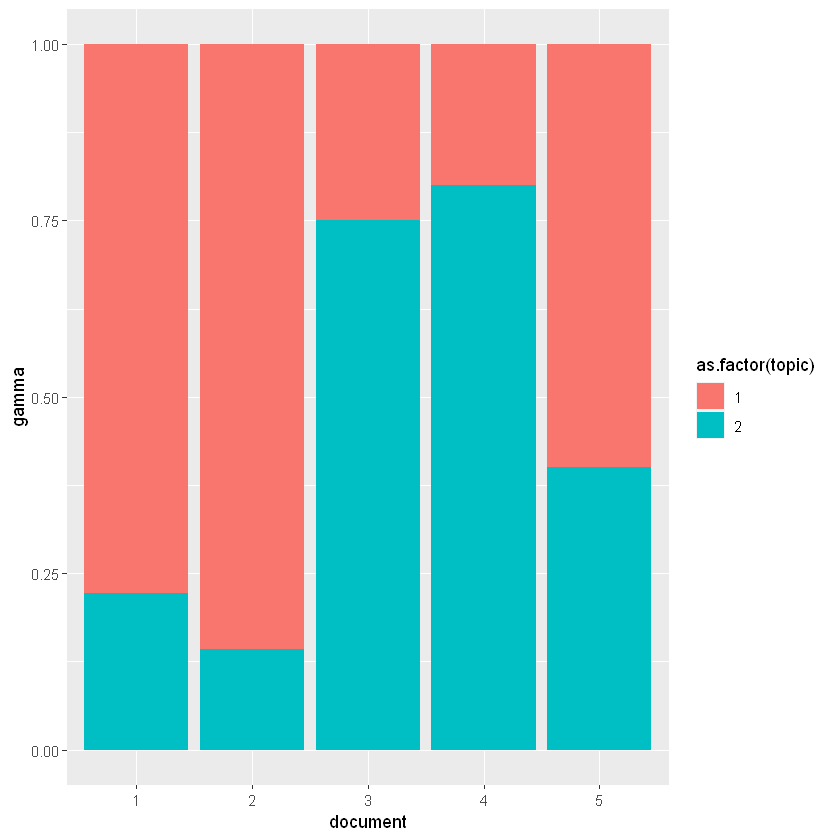

In [9]:
tidy(lda_mod1, matrix="gamma") %>% ggplot(aes(x=document, y=gamma)) + geom_col(aes(fill=as.factor(topic)))

lda_mod2 <- LDA(x=dtm, k=2, method="Gibbs", control=list(alpha=1, seed=12345))
tidy(lda_mod2, matrix="gamma") %>% ggplot(aes(x=document, y=gamma)) + geom_col(aes(fill=as.factor(topic)))

## Effect of argument alpha 

* Low alpha - Each document often contains only 1 topic
* High alpha - Each document often contains a mixture of all topics

In [10]:
# Fit LDA topic model using Gibbs sampling for 2 topics
mod1 <- LDA(x=dtm, k=2, method="Gibbs", control=list(alpha=1, seed=12345))

# Display the probabilities of topics in documents side by side
tidy(mod1, matrix='gamma') %>% spread(topic, gamma)

# Fit LDA topic model using Gibbs sampling for 2 topics
mod2 <- LDA(x=dtm, k=2, method="Gibbs", control=list(alpha=25, seed=12345))

# Display the probabilities of topics in documents side by side
tidy(mod2, matrix='gamma') %>% spread(topic, gamma)

document,1,2
<chr>,<dbl>,<dbl>
1,0.7777778,0.2222222
2,0.8571429,0.1428571
3,0.2500000,0.7500000
4,0.2000000,0.8000000
5,0.6000000,0.4000000


document,1,2
<chr>,<dbl>,<dbl>
1,0.5087719,0.4912281
2,0.5090909,0.4909091
3,0.5000000,0.5000000
4,0.4905660,0.5094340
5,0.4905660,0.5094340


LDA is an acronym of Latent Dirichlet Allocation.

## What is the correct pronunciation of "Dirichlet"? Why?

To learn more about LDA: https://www.youtube.com/watch?v=T05t-SqKArY&list=PLs8w1Cdi-zvYskDS2icIItfZgxclApVLv